In [7]:
from sklearn.model_selection import TimeSeriesSplit

import acquire
import prepare

Remember to document your thoughts and any takeaways as you work through visualizations!

Using your store items data you prepped in lesson 2 exercises:

- Split your data into train and test using the sklearn.model_selection.TimeSeriesSplit method.
- Validate your splits by plotting X_train and y_train.
- Plot the weekly average & the 7-day moving average. Compare the 2 plots.
- Plot the daily difference. Observe whether usage seems to vary drastically from day to day or has more of a smooth transition.
- Plot a time series decomposition.
- Create a lag plot (day over day).
- Run a lag correlation.

Using your OPS data you prepped in lesson 2 exercises:

- Split your data into train and test using the percent cutoff method.
- Validate your splits by plotting X_train and y_train.
- Plot the weekly average & the 7-day moving average. Compare the 2 plots.
- Group the electricity consumption time series by month of year, to explore annual seasonality.
- Plot the daily difference. Observe whether usage seems to vary drastically from day to day or has more of a smooth transition.
- Plot a time series decomposition. Takeaways?

If time:
- For each store I want to see how many items were sold over a period of time, for each item. Find a way to chart this. Hints: Subplots for the piece with the fewest distinct values (like store), x = time, y = count, color = item. If you have too many distinct items, you may need to plot the top n, while aggregating the others into an 'other' bucket.



In [8]:
df = acquire.combine_dfs()
df = prepare.prep_store_data(df)

In [10]:
df

,item,sale_amount,sale_id,store,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,month,weekday,sales_total
sale_date,,,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,1,13.0,1,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,01-Jan,2-Tue,10.92
2013-01-01 00:00:00+00:00,17,26.0,295813,3,2118 Fredericksburg Rdj,San Antonio,3,TX,78201,Ducal,17,Ducal Refried Red Beans,1.16,88313590791,88313590791,01-Jan,2-Tue,30.16
2013-01-01 00:00:00+00:00,7,32.0,125995,10,8503 NW Military Hwy,San Antonio,10,TX,78231,Twinings Of London,7,Twinings Of London Classics Lady Grey Tea - 20 Ct,9.64,70177154004,70177154004,01-Jan,2-Tue,308.48
2013-01-01 00:00:00+00:00,18,45.0,314073,3,2118 Fredericksburg Rdj,San Antonio,3,TX,78201,Scotch,18,Scotch Removable Clear Mounting Squares - 35 Ct,4.39,21200725340,21200725340,01-Jan,2-Tue,197.55
2013-01-01 00:00:00+00:00,19,34.0,332333,3,2118 Fredericksburg Rdj,San Antonio,3,TX,78201,Careone,19,Careone Family Comb Set - 8 Ct,0.74,41520035646,41520035646,01-Jan,2-Tue,25.16
2013-01-01 00:00:00+00:00,20,29.0,350593,3,2118 Fredericksburg Rdj,San Antonio,3,TX,78201,Usda Produce,20,Plums Black,5.62,204040000000,204040000000,01-Jan,2-Tue,162.98
2013-01-01 00:00:00+00:00,6,32.0,107735,10,8503 NW Military Hwy,San Antonio,10,TX,78231,Sally Hansen,6,Sally Hansen Nail Color Magnetic 903 Silver El...,6.93,74170388732,74170388732,01-Jan,2-Tue,221.76
2013-01-01 00:00:00+00:00,21,25.0,368853,3,2118 Fredericksburg Rdj,San Antonio,3,TX,78201,Doctors Best,21,Doctors Best Best Curcumin C3 Complex 1000mg T...,8.09,753950001954,753950001954,01-Jan,2-Tue,202.25
2013-01-01 00:00:00+00:00,22,50.0,387113,3,2118 Fredericksburg Rdj,San Antonio,3,TX,78201,Betty Crocker,22,Betty Crocker Twin Pack Real Potatoes Scallope...,7.31,16000288829,16000288829,01-Jan,2-Tue,365.50


In [9]:
by_day = prepare.get_sales_by_day(df)
by_day.head()

,sales_total,diff_with_last_day
sale_date,,
2013-01-01 00:00:00+00:00,73844.01,NaN
2013-01-02 00:00:00+00:00,73570.58,-273.43
2013-01-03 00:00:00+00:00,78169.48,4598.90
2013-01-04 00:00:00+00:00,84467.73,6298.25
2013-01-05 00:00:00+00:00,87621.85,3154.12


##### Split your data into train and test using the sklearn.model_selection.TimeSeriesSplit method.

In [13]:
df2 = df.reset_index()
X = df2.sale_date
y = df2.sales_total

In [14]:
tss=TimeSeriesSplit(n_splits=5,max_train_size=None)
for train_index,test_index in tss.split(X):
    print("TRAIN:",train_index,"TEST:",test_index)
    X_train,X_test=X[train_index],X[test_index]
    y_train,y_test=y[train_index],y[test_index]

TRAIN: [     0      1      2 ... 152167 152168 152169] TEST: [152170 152171 152172 ... 304333 304334 304335]
TRAIN: [     0      1      2 ... 304333 304334 304335] TEST: [304336 304337 304338 ... 456499 456500 456501]
TRAIN: [     0      1      2 ... 456499 456500 456501] TEST: [456502 456503 456504 ... 608665 608666 608667]
TRAIN: [     0      1      2 ... 608665 608666 608667] TEST: [608668 608669 608670 ... 760831 760832 760833]
TRAIN: [     0      1      2 ... 760831 760832 760833] TEST: [760834 760835 760836 ... 912997 912998 912999]


##### Validate your splits by plotting X_train and y_train.

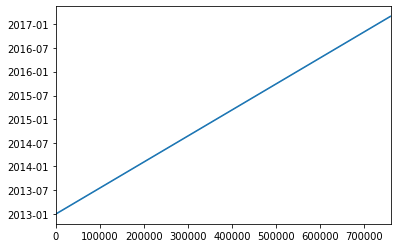

In [16]:
X_train.plot()
plt.show()

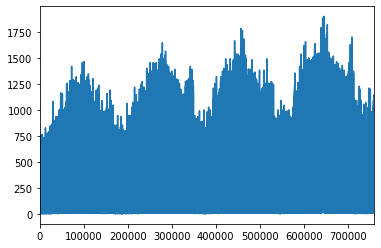

In [17]:
y_train.plot()
plt.show()

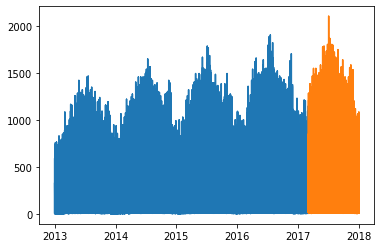

In [20]:
plt.plot(X_train, y_train)
plt.plot(X_test, y_test)
plt.show()

##### Plot the weekly average & the 7-day moving average. Compare the 2 plots.

##### Plot the daily difference. Observe whether usage seems to vary drastically from day to day or has more of a smooth transition.

##### Plot a time series decomposition.

##### Create a lag plot (day over day).

##### Run a lag correlation.